In [3]:
# https://www.youtube.com/watch?v=H6du_pfuznE&ab_channel=KrishNaik
import math
import pandas_datareader as web
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
# print(plt.style.available)
plt.style.use('fivethirtyeight')

In [10]:
end_date = datetime.today().strftime('%Y-%m-%d')
ticker = 'APPL'
df = yf.download(ticker , start ='2000-01-01', end=end_date) 
df

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['APPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,APPL,APPL,APPL,APPL,APPL,APPL
Date,,,,,,


In [5]:
df1 = df.reset_index()['Close']

In [6]:
df1.shape

(0, 1)

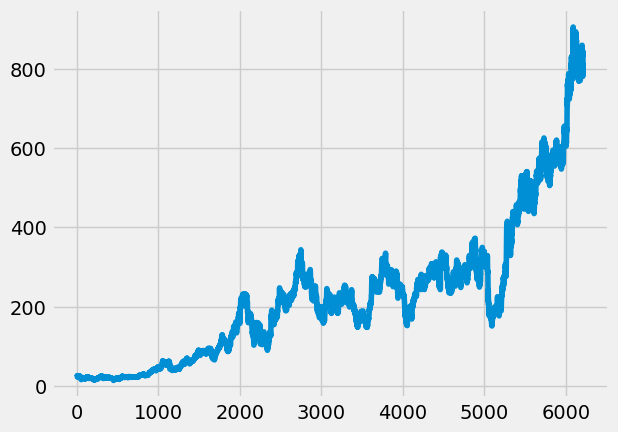

In [43]:
plt.plot(df1)

In [44]:
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [45]:
df1.shape
print(df1)

[[0.01080661]
 [0.01244029]
 [0.01131416]
 ...
 [0.91981426]
 [0.92513756]
 [0.92524967]]


In [46]:
# split into train and test
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [47]:
import numpy
# cnvert array values into dTaset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [48]:
# reshape into X=t,t+1,t+2,T+3,t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [49]:
print(X_train.shape), print(y_train.shape)

(3939, 100)
(3939,)


(None, None)

In [50]:
print(X_test.shape), print(ytest.shape)

(2075, 100)
(2075,)


(None, None)

In [51]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [52]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


c:\Users\prakh\OneDrive\Desktop\lstmpricemain\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - loss: 0.0031 - val_loss: 5.7572e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - loss: 1.0074e-04 - val_loss: 5.8287e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 9.5207e-05 - val_loss: 4.9864e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 9.2954e-05 - val_loss: 6.7311e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 8.7546e-05 - val_loss: 7.2705e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 7.8301e-05 - val_loss: 8.0388e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 7.1594e-05 - val_loss: 0.0019
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 6.9252e-05 - val_loss: 0.0010
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 6.9743e-05 - val_loss: 0.0011
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 6.9519e-05 - val_loss: 7.4766e-04
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 6.4865e-05 - val_lo

In [55]:
model.save('pricetrend.h5')

In [56]:
import tensorflow as tf

In [57]:
tf.__version__

'2.18.0'

In [58]:
# do prediction and check performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [59]:
train_predict.shape

(3939, 1)

In [60]:
# Reshape predictions to 2D for inverse scaling
train_predict = train_predict.reshape(-1, train_predict.shape[-1])
test_predict = test_predict.reshape(-1, test_predict.shape[-1])

In [61]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [62]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.67656735100502

In [63]:
math.sqrt(mean_squared_error(ytest,test_predict))

434.46048317165486

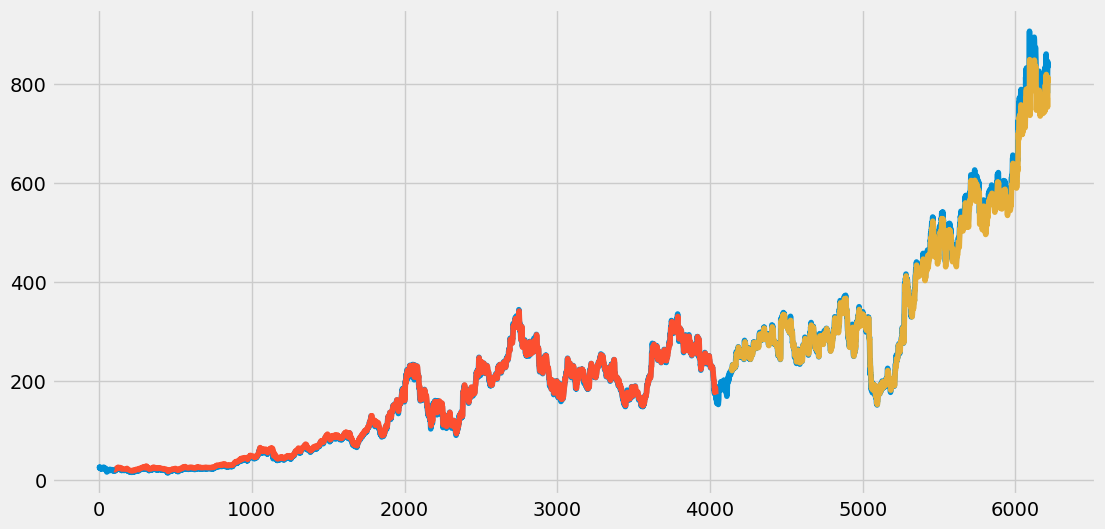

In [64]:
# plotting
Look_back=100
trainPredictPlot= numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[Look_back:len(train_predict)+Look_back, :] = train_predict
# shift test prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(Look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and prediction
plt.figure(figsize=(12,6))

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [65]:
len(test_data)

2176

In [66]:
x_input=test_data[2076:].reshape(1,-1)
x_input.shape

(1, 100)

In [67]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [68]:
from numpy import array
lst_output = []
n_steps = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print('{} day input {} '.format(i,x_input))
        x_input = x_input.reshape(1, n_steps , 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

print(lst_output)

[0.87108076]
101
1 day input [0.95029716 0.93651264 0.945142   0.94850408 0.97276707 0.97203866
 0.98643956 0.98173263 0.96766793 0.95321101 0.93987472 0.93595229
 0.95158599 0.9618403  0.96318515 0.96273691 0.95181014 0.93522381
 0.89465473 0.87902103 0.89129264 0.89062019 0.90883147 0.89571933
 0.8788529  0.88496069 0.89515899 0.89695214 0.90434869 0.89902539
 0.90434869 0.89880124 0.89846505 0.89941768 0.89213316 0.89784868
 0.89908142 0.90642202 0.90939182 0.90009007 0.90261163 0.86198646
 0.86394767 0.86215459 0.84640878 0.8678701  0.87134423 0.86540456
 0.86243476 0.87347358 0.87033565 0.86108992 0.88367187 0.8796374
 0.87386579 0.88367187 0.88456848 0.86803824 0.87818051 0.87498649
 0.87784431 0.84870626 0.86080974 0.87868483 0.87834857 0.88131844
 0.88737021 0.88680987 0.88770641 0.89398227 0.9044608  0.89723231
 0.87083997 0.86590889 0.87549081 0.8602494  0.87268908 0.91824533
 0.90675821 0.90423665 0.90535735 0.91505131 0.93673679 0.94301265
 0.94839197 0.9299566  0.93499973 

In [69]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [70]:
len(df1)

6216

In [71]:
df3 = df1.tolist()
df3.extend(lst_output)

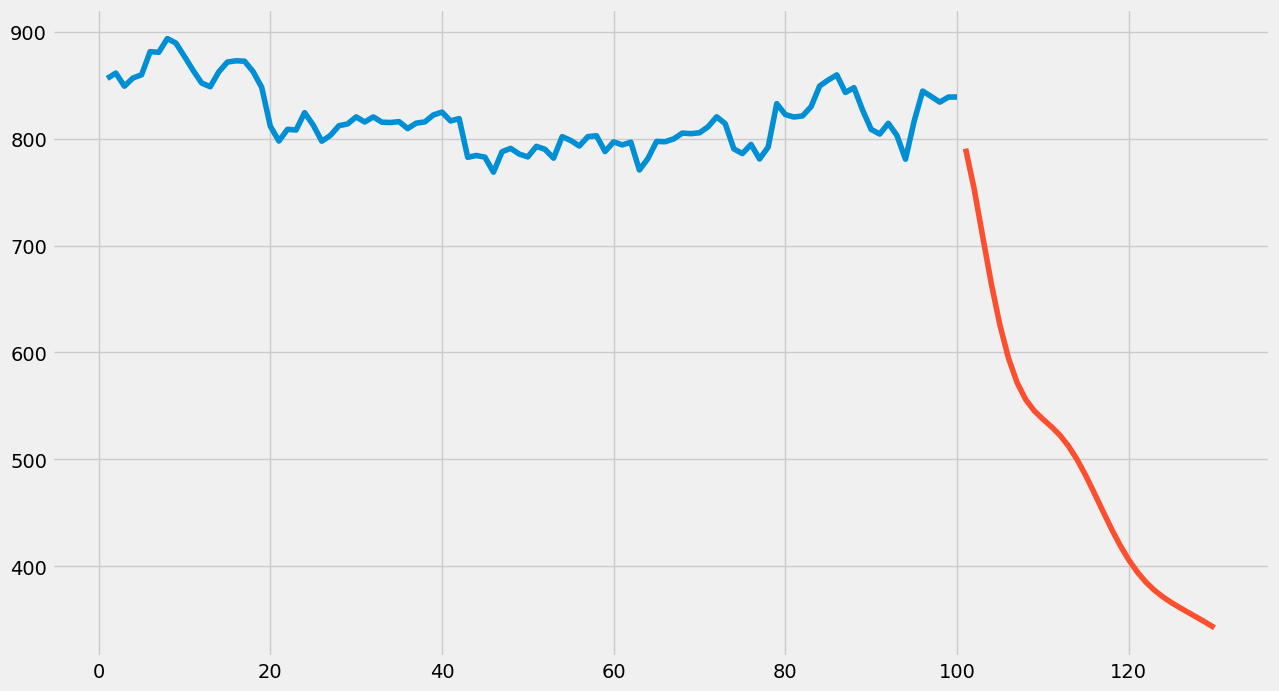

In [72]:
plt.figure(figsize=(14,8))

plt.plot(day_new,scaler.inverse_transform(df1[6116:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

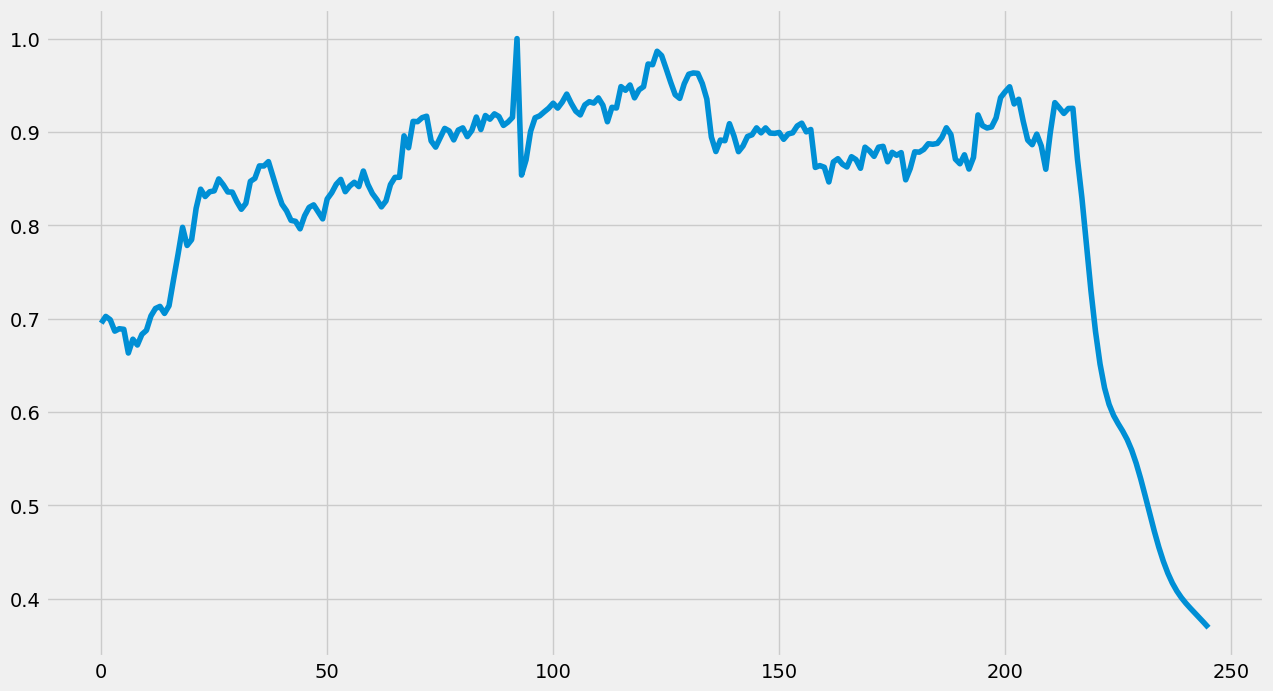

In [73]:
plt.figure(figsize=(14,8))

df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6000:])

In [74]:
model.save('lstmpricetrendpred.h5')